In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1)

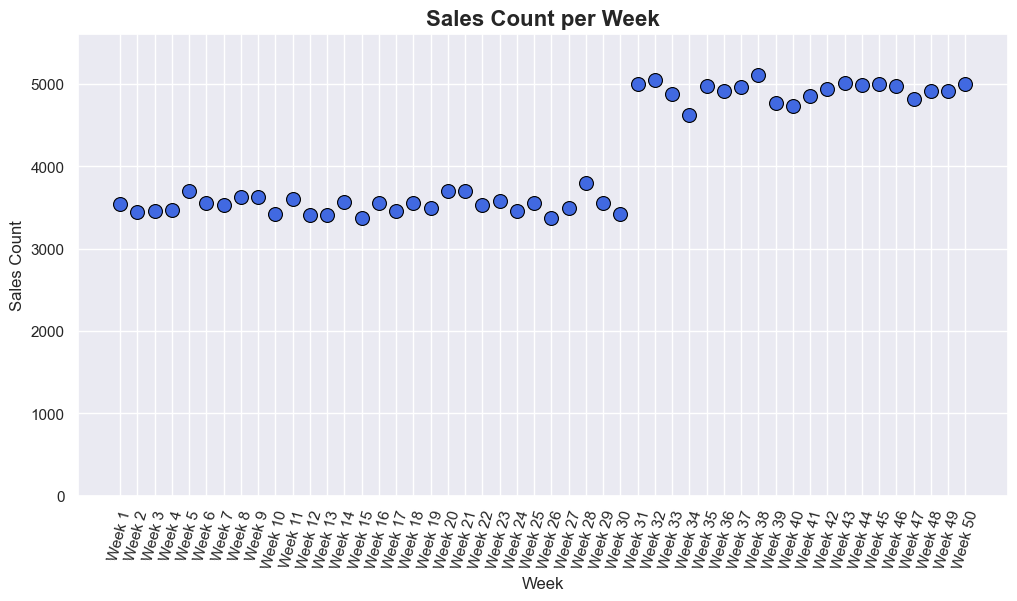

In [69]:
csv_files = glob.glob('datasets/*.csv')

list_weeks = {}

for idx, dataf in enumerate([pd.read_csv(f) for f in csv_files]):
    list_weeks[f'Week {idx+1}'] = dataf['sale_time'].count()

df = pd.DataFrame(list(list_weeks.items()), columns=['week', 'sales'])

plt.figure(figsize=(12, 6))

sns.set()
sns.scatterplot(data=df, x='week', y='sales', s=100, color='royalblue', marker='o', edgecolor='black')

plt.title("Sales Count per Week", fontsize=16, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)

plt.ylim(0, df['sales'].max() + 500)
plt.xticks(rotation=75)

plt.show()

# 2)

Ao olhar o gráfico, podemos perceber que à partir da semana 30 ocorre um aumento anormal nas vendas

# 3)

In [19]:
from scipy import stats

csv_files = glob.glob('datasets/*.csv')

list_weeks_before_30 = {}
list_weeks_after_30 = {}

for idx, dataf in enumerate([pd.read_csv(f) for f in csv_files]):
    if idx < 30:
        list_weeks_before_30[f'Week {idx+1}'] = dataf['sale_time'].count()
    else:
        list_weeks_after_30[f'Week {idx+1}'] = dataf['sale_time'].count()

t_stat, p_value = ttest_ind(list(list_weeks_before_30.values()), list(list_weeks_after_30.values()))

print(f'O P_Value é menor que 0.05? {'Sim' if (p_value < 0.05) else 'No'}')

O P_Value é menor que 0.05? Sim


Aqui podemos observar que o nosso p-value é menor do que 0.05, o que nos informa que podemos rejeitar a Null Hypothesis, ou seja, que essa mudança é **Estatísticamente Significativa**

# 4)

<Axes: >

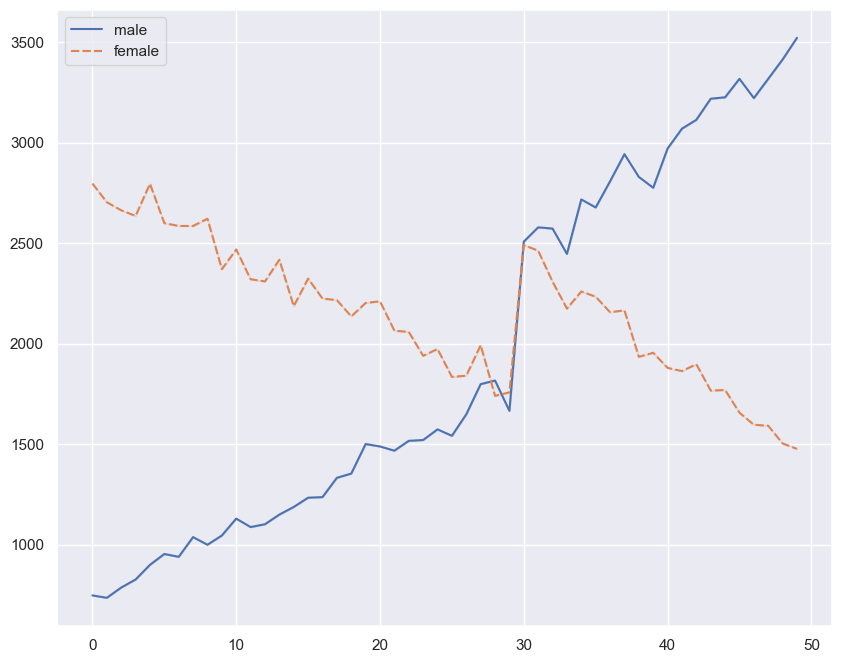

In [83]:
csv_files = glob.glob('datasets/*.csv')

male_list = []
female_list = []

for dataf in [pd.read_csv(f) for f in csv_files]:
    male_list.append(dataf[dataf['purchaser_gender'] == 'male'].value_counts().sum())

    female_list.append(dataf[dataf['purchaser_gender'] == 'female'].value_counts().sum())

dict_week = {'male': male_list, 'female': female_list}

male_female_df = pd.DataFrame(dict_week)

df = pd.concat([df, male_female_df], axis=1)

plt.figure(figsize=(10, 8))
sns.lineplot(data=df[['week', 'male', 'female']])

O plot traz várias evidências

+ Desde o início o número de **mulheres** que compram diminuia

+ Desde o início o número de **homens** que compram aumentava

Mas após a semana 30 houve um significativo aumento no númeo de homens e mulheres que compraram e após isso a tendência de **número de mulheres diminuir** e o de **homens aumentar** continuou